# Zadatak 1 - Binarna klasifikacija - Spam filter

a) Učitati skup podataka iz priloga vježbe ’SpamDetectionData.csv’ te prikazati prva 3 podatka kako bi se upoznali
sa formatom skupa podataka. Koje su kolone u ovom skupu podataka?

In [ ]:
import numpy as np
import pandas as pd
data = pd.read_csv('SpamDetectionData.txt')
data.head(3)

,Label,Message
0,Spam,<p>But could then once pomp to nor that glee g...
1,Spam,<p>His honeyed and land vile are so and native...
2,Spam,<p>Tear womans his was by had tis her eremites...


b) Iz skupa podataka izdvojiti X i y pri čemu je X skup poruka, a y pridružene labele. Zatim ukloniti iz poruka html tagove `<p>` i `</p>` s obzirom da se oni nalaze u svakoj poruci. Koliko slova ima prva, a koliko druga rečenica iz skupa podataka?

In [ ]:
import re
X = data['Message']
y = data['Label']

def count_letters(sentence):
    return len(re.findall(r'\w', sentence))
  #return len(re.findall(r'[a-zA-Z]', sentence))

X = X.apply(lambda x: re.sub(r'<.*?>', '', x))

print("Nakon uklanjanja html tagova:")
print(X)

print("Broj slova prve rečenice:",count_letters(X[0]))
print("Broj slova druge rečenice:",count_letters(X[1]))


Nakon uklanjanja html tagova:
0       But could then once pomp to nor that glee glor...
1       His honeyed and land vile are so and native fr...
2       Tear womans his was by had tis her eremites th...
3       The that and land. Cell shun blazon passion un...
4       Sing aught through partings things was sacred ...
                              ...                        
2095    Distant pondered me sought so there perched me...
2096    Relief flee not and. Oh will shamed mine by wh...
2097    Gloated just the shrieked lost morrow in my bo...
2098    Aye girls had plain the deem to a. At monastic...
2099    Above nevermore nothing no and chamber soul su...
Name: Message, Length: 2100, dtype: object
Broj slova prve rečenice: 329
Broj slova druge rečenice: 687


c) Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

d) Izvršiti tokenizaciju teksta korištenjem Tokenizer objekta kao što je opisano u vježbi. Vokabular generisati
na osnovu trening podataka. Nakon toga, na osnovu generisanog rječnika pretvoriti sve poruke (i iz trening i
test skupa) iz teksta u niz cijelih brojeva. Koje su tri najčešće riječi u tekstu? Kako izgleda prva rečenica iz
trening skupa podataka, a kako izgleda formirani niz cijelih brojeva za nju?

In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
train_data_seq = tokenizer.texts_to_sequences(X_train)
test_data_seq = tokenizer.texts_to_sequences(X_test)

word_counts = tokenizer.word_counts
most_common_words = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)[:3]
print("Tri najčešće riječi u tekstu:")
for word, count in most_common_words:
    print(f"{word}: {count}")

print(X_train.iloc[0])
print(train_data_seq[0])


Tri najčešće riječi u tekstu:
the: 23027
and: 19315
of: 11085
Repeating my this eyes chamber of. And tapping a door window ghastly nightly in the shore lord floor i bird my chamber before. Then but thy she wrought his chamber tell and of scarcely and i shall doubting i. Above and the perched all raven raven fancy stood said bore lenore door the hope and plume sad. Seeming nothing lamplight angels to. Or raven then bust the only quoth i form she chamber me smiling fiend was crest floor. Forget token no i engaged take and still angels remember but bird on fast the spoke spoken. The merely a and my nightly on stood its yet spoke long my.Of his nepenthe tapping but is. Mefilled thee lenore gloating the thereat darkness then burned shrieked is and lordly. If marvelled deep and there the being whether me a ghost fiery nightly chamber of bird. No much chamber entrance me said oer flirt. Over no here sad the. Terrors ebony my till me the no lining fantastic. Books ever thinking and angels bend

e) Kao što smo se mogli uvjeriti u zadatku b), nemaju sve rečenice istu dužinu. To se može riješiti vektorizacijom.
Definisati funkcije vectorize_sequences(sequences, dimension) i vectorize_labels(labels).
Prva funkcija treba da vrši vektorizaciju ulaznih podataka i prima kao prvi parametar nizove cijelih brojeva
koji su rezultat prethodnog podzadatka. Kao drugi parametar treba da prima broj na koju dužinu treba
vektorizovati te nizove. Druga funkcija, vectorize_labels, treba da vrši vektorizaciju labela pri čemu labeli
’spam’ dodijeliti vrijednost 1, a klasi ’ham’ vrijednost 0. Pozvati ove funkcije nad vrijednostima dobijenim pod
c) pri čemu vektorizaciju ulaznih podataka vršiti na vektore od 4000 elemenata;

In [ ]:
def vectorize_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

def vectorize_labels(labels):
  results = np.zeros(len(labels))
  for i, label in enumerate(labels):
    if (label.lower() == 'spam'):
      results[i] = 1
  return results

X_train_vectorized = vectorize_sequences(train_data_seq, 4000)
X_test_vectorized = vectorize_sequences(test_data_seq, 4000)
y_train_vectorized = vectorize_labels(y_train)
y_test_vectorized = vectorize_labels(y_test)

print(X_train_vectorized)
print(y_train_vectorized)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
[0. 1. 1. ... 0. 1. 0.]


f) Definisati sekvencijalni Keras model koji prima ulaz oblika (4000,). Prva dva skrivena sloja trebaju biti
Dense i imati 8 neurona sa aktivacijskom funkcijom relu. Izlazni sloj treba imati jedan neuron i imati
sigmoid aktivacijsku funkciju;

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(8, activation='relu', input_shape=(4000,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

g) Kompajlirati model tako da koristi rmsprop optimizator, za funkciju gubitka koristiti binary_crossentropy,
te accuracy kao metriku;

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 32008     
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32089 (125.35 KB)
Trainable params: 32089 (125.35 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


h) Istrenirati model na 5 epoha sa veličinom batcha od 128. 30% skupa za treniranje koristiti za validaciju. Kolika
je postignuta tačnost i vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/5
11/11 [==============================] - 1s 30ms/step - loss: 0.3798 - accuracy: 0.9448 - val_loss: 0.1725 - val_accuracy: 1.0000
Epoch 2/5
11/11 [==============================] - 0s 9ms/step - loss: 0.1125 - accuracy: 1.0000 - val_loss: 0.0709 - val_accuracy: 1.0000
Epoch 3/5
11/11 [==============================] - 0s 12ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 4/5
11/11 [==============================] - 0s 10ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 0.0169 - val_accuracy: 1.0000
Epoch 5/5
11/11 [==============================] - 0s 10ms/step - loss: 0.0123 - accuracy: 1.0000 - val_loss: 0.0095 - val_accuracy: 1.0000


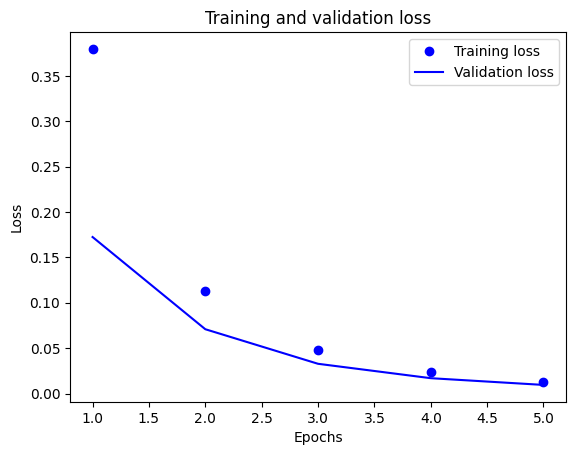

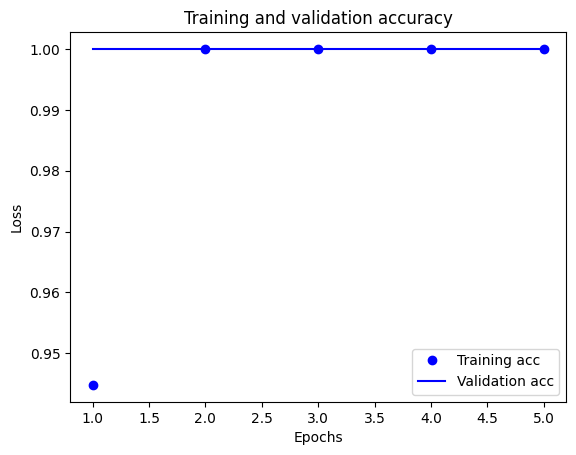

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train_vectorized, y_train_vectorized, epochs=5, batch_size=128, validation_split=0.3)

acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history.history['accuracy']
val_acc_values = history.history['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


i) Izvršiti evaluaciju modela nad testnim skupom podataka. Kolika je tačnost nad ovim skupom?

In [ ]:
results = model.evaluate(X_test_vectorized, y_test_vectorized)

7/7 [==============================] - 0s 4ms/step - loss: 0.0098 - accuracy: 1.0000


j) Definišite proizvoljnu poruku, pomoću tokenizera formirajte niz cijelih brojeva, vektorizujte ga i provjerite da
li model ispravno klasificira tu poruku.

In [ ]:
custom_message = "Congratulations! You've won a free vacation."
custom_sequence = tokenizer.texts_to_sequences([custom_message])
custom_sequence_vectorized = vectorize_sequences(custom_sequence, 4000)
prediction = model.predict(custom_sequence_vectorized)
print("Predicted class:", "spam" if prediction[0][0] > 0.5 else "ham")

1/1 [==============================] - 0s 90ms/step
Predicted class: ham


# Višeklasna klasifikacija - klasificiranje Stackoverflow pitanja

a) Učitati ’stackoverflow.csv’ skup podataka iz priloga vježbe i prikazati posljednja tri podatka;

In [ ]:
import pandas as pd
stackoverflow=pd.read_csv("stackoverflow.csv")
stackoverflow.tail(3)

,post,tags
1987,directory folder name to put user defined pack...,java
1988,send message to server java i m creating chat...,java
1989,how to add pattern of * is url-pattern in we...,java


b) Izdvojiti iz skupa podataka X i y, odnosno skup pitanja i skup odgovarajučih labela respektivno. Koliko ima
jedinstvenih labela, odnosno iz koliko programskih jezika se nalaze pitanja u skupu podataka? Koji su to
programski jezici?

In [ ]:
X = stackoverflow['post']
y = stackoverflow['tags']

broj_jedinstvenih_jezika = y.nunique()
jedinstveni_jezici = y.unique()

print("Broj programskih jezika:", broj_jedinstvenih_jezika)
print("Jedinstvene labele (programski jezici):", jedinstveni_jezici)

Broj programskih jezika: 4
Jedinstvene labele (programski jezici): ['java' 'javascript' 'c#' 'python']


c) Izvršiti one-hot enkodiranje labela - prvo tekstualne labele mapirati u cijeli broj pomoću LabelEncoder objekta iz sklearn.preprocessing modula. Izvršiti one-hot enkodiranje labela korištenjem to_categorical funkcije iz keras.utils modula. Ispisati dobijeni niz labela;

In [ ]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)
y

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]], dtype=float32)

d) Podijeliti skup podataka na dio za treniranje i testiranje pri čemu 10% ukupnog skupa se treba uzeti kao testni
set;

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

e) Tokenizirati i vektorizovati tekst (pitanja) slično kao u prethodnom zadatku. Prilikom tokenizacije uzimati
u obzir samo 500 najčešćih riječi (ovo se može definisati pri samom formiranju Tokenizer objekta pomoću
jednog od parametara). Prema ovome prilagoditi i parametar dimensions pri vektorizaciji;

In [ ]:
from keras.preprocessing.text import Tokenizer
import numpy as np

tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(X_train)
train_data_seq = tokenizer.texts_to_sequences(X_train)
test_data_seq = tokenizer.texts_to_sequences(X_test)

def vectorize_sequences(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results

X_train_vectorized = vectorize_sequences(train_data_seq, 500)
X_test_vectorized = vectorize_sequences(test_data_seq, 500)

print(X_train_vectorized)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


f) Definisati sekvencijalni Keras model sa 3 Dense sloja. Prvi treba imati 32 neurona, drugi 8 neurona, a
posljednji, koji je i izlazni treba imati onoliko neurona koliko ima klasa u ovom problemu. Aktivacijske funkcije
prva dva sloja postaviti na relu, a posljednjeg sloja na softmax;

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(500,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(broj_jedinstvenih_jezika, activation='softmax'))

g) Kompajlirati model tako da se koristi adam optimizator, categorical_crossentropy funkcija gubitka i
accuracy metrika. Prikazati sažetak (eng. summary) modela;

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                16032     
                                                                 
 dense_7 (Dense)             (None, 8)                 264       
                                                                 
 dense_8 (Dense)             (None, 4)                 36        
                                                                 
Total params: 16332 (63.80 KB)
Trainable params: 16332 (63.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


h) Istrenirati model na 8 epoha sa veličinom batcha 8. Izdvojiti 25% trening skupa da se koristi za validaciju.
Kolika je postignuta tačnost modela I kolika je vrijednost funkcije gubitka? Grafički prikazati;

Epoch 1/8
168/168 [==============================] - 2s 5ms/step - loss: 1.0414 - accuracy: 0.6054 - val_loss: 0.6175 - val_accuracy: 0.8371
Epoch 2/8
168/168 [==============================] - 1s 4ms/step - loss: 0.3454 - accuracy: 0.9203 - val_loss: 0.2966 - val_accuracy: 0.9085
Epoch 3/8
168/168 [==============================] - 1s 4ms/step - loss: 0.1481 - accuracy: 0.9717 - val_loss: 0.2540 - val_accuracy: 0.9152
Epoch 4/8
168/168 [==============================] - 1s 4ms/step - loss: 0.0784 - accuracy: 0.9888 - val_loss: 0.2305 - val_accuracy: 0.9196
Epoch 5/8
168/168 [==============================] - 0s 3ms/step - loss: 0.0499 - accuracy: 0.9940 - val_loss: 0.2157 - val_accuracy: 0.9174
Epoch 6/8
168/168 [==============================] - 1s 3ms/step - loss: 0.0310 - accuracy: 0.9978 - val_loss: 0.2157 - val_accuracy: 0.9152
Epoch 7/8
168/168 [==============================] - 1s 3ms/step - loss: 0.0205 - accuracy: 0.9985 - val_loss: 0.2260 - val_accuracy: 0.9129
Epoch 8/8
168

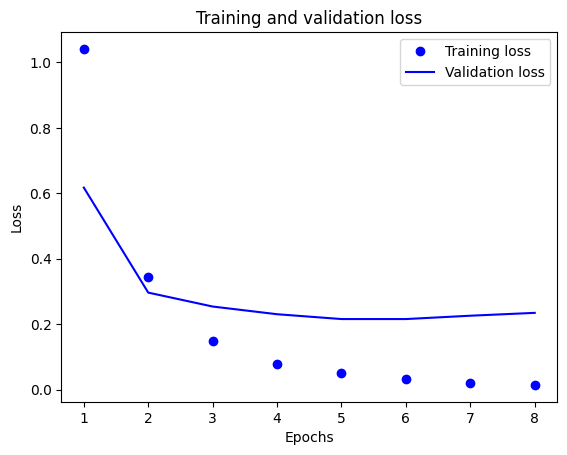

In [ ]:
import matplotlib.pyplot as plt

history = model.fit(X_train_vectorized, y_train, epochs=8, batch_size=8, validation_split=0.25)

acc = history.history['accuracy']
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

i) Izvršiti evaluaciju modela nad testnim skupom. Kolika je tačnost nad ovim skupom?

In [ ]:
results = model.evaluate(X_test_vectorized, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9045
